kgmyh@naver.com 으로 `이름_주유소가격 데이터 분석.html` 로 제출
- html 파일로 변환
    - File > Download as > HTML (.html) 선택

# 데이터 불러오기

- 2022년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 상반기, 하반기 주유소 가격 데이터 조회
d1 = pd.read_csv('data/2022년_서울_상반기_일별_가격.csv', encoding='cp949')
d2 = pd.read_csv('data/2022년_서울_하반기_일별_가격.csv', encoding='cp949')
d1.shape, d2.shape

((82689, 11), (81793, 11))

In [9]:
# 상반기, 하반기 DataFrame 합치기
df = pd.concat([d1, d2], ignore_index=True)
df.shape

(164482, 11)

In [11]:
# DataFrame 기본 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      164482 non-null  object
 1   지역      164482 non-null  object
 2   상호      164482 non-null  object
 3   주소      164482 non-null  object
 4   기간      164482 non-null  int64 
 5   상표      164482 non-null  object
 6   셀프여부    164482 non-null  object
 7   고급휘발유   164482 non-null  int64 
 8   휘발유     164482 non-null  int64 
 9   경유      164482 non-null  int64 
 10  실내등유    164482 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 13.8+ MB


In [12]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0


In [14]:
df.tail(10)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
164472,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221222,GS칼텍스,셀프,0,1525,1745,0
164473,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221223,GS칼텍스,셀프,0,1525,1745,0
164474,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221224,GS칼텍스,셀프,0,1525,1745,0
164475,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221225,GS칼텍스,셀프,0,1525,1745,0
164476,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221226,GS칼텍스,셀프,0,1525,1745,0
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0
164481,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221231,GS칼텍스,셀프,0,1515,1715,0


In [15]:
df.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [16]:
df.describe()  #  정수/실수 타입 컬럼

,기간,고급휘발유,휘발유,경유,실내등유
count,1.644820e+05,164482.000000,164482.000000,164482.000000,164482.000000
mean,2.022066e+07,1083.639146,1877.600838,1907.360337,538.948444
std,3.456995e+02,1085.018886,243.317021,237.067045,761.401689
min,2.022010e+07,0.000000,0.000000,0.000000,0.000000
25%,2.022033e+07,0.000000,1690.000000,1817.000000,0.000000
50%,2.022063e+07,1760.000000,1855.000000,1899.000000,0.000000
75%,2.022093e+07,2130.000000,2030.000000,2018.000000,1451.000000
max,2.022123e+07,3496.000000,3096.000000,3230.000000,2719.000000


In [17]:
df.describe(include='object') # 문자열(object) 

,번호,지역,상호,주소,상표,셀프여부
count,164482,164482,164482,164482,164482,164482
unique,469,25,464,469,7,2
top,A0006039,서울 강남구,대성주유소,서울 강남구 논현로 640,SK에너지,셀프
freq,365,12278,730,365,48267,92478


In [21]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()
df['상표'].value_counts()
df['상표'].value_counts(normalize=True)

SK에너지     0.293449
현대오일뱅크    0.257481
GS칼텍스     0.245917
S-OIL     0.174864
알뜰주유소     0.021589
자가상표      0.004481
알뜰(ex)    0.002219
Name: 상표, dtype: float64

In [26]:
# 지역 컬럼의 고유값 조회
df['지역'].unique()
df['지역'].value_counts()
df['지역'].value_counts(normalize=True)

서울 강남구     0.074646
서울 강서구     0.071892
서울 송파구     0.068670
서울 서초구     0.068281
서울 영등포구    0.059666
서울 양천구     0.054808
서울 성북구     0.051811
서울 구로구     0.044892
서울 동대문구    0.039968
서울 성동구     0.036515
서울 도봉구     0.036430
서울 은평구     0.035305
서울 노원구     0.033280
서울 서대문구    0.033268
서울 강동구     0.031067
서울 광진구     0.031049
서울 관악구     0.031031
서울 중랑구     0.029626
서울 용산구     0.028192
서울 강북구     0.027115
서울 마포구     0.026599
서울 금천구     0.024726
서울 중구      0.022148
서울 동작구     0.020890
서울 종로구     0.018124
Name: 지역, dtype: float64

In [27]:
df['셀프여부'].value_counts()

셀프    92478
일반    72004
Name: 셀프여부, dtype: int64

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


In [33]:
'서울 강남구'.split()[1]
# '서울 강남구'.slice(3) => str accessor 이용
'서울 강남구'[3:]

'강남구'

In [39]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출해서 파생변수컬럼 생성)
df['구'] = df['지역'].apply(lambda x : x.split()[1])
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0,강남구


In [38]:
df['지역'].str.slice(3)

0         강남구
1         강남구
2         강남구
3         강남구
4         강남구
         ... 
164477    중랑구
164478    중랑구
164479    중랑구
164480    중랑구
164481    중랑구
Name: 지역, Length: 164482, dtype: object

In [43]:
# 기간 컬럼을 datetime 타입으로 변경
df['기간'] = pd.to_datetime(df['기간'], format="%Y%m%d")  #Y:년, m:월(2자리), d:일,  H: 시간, M:분, S: 초

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      164482 non-null  object        
 1   지역      164482 non-null  object        
 2   상호      164482 non-null  object        
 3   주소      164482 non-null  object        
 4   기간      164482 non-null  datetime64[ns]
 5   상표      164482 non-null  object        
 6   셀프여부    164482 non-null  object        
 7   고급휘발유   164482 non-null  int64         
 8   휘발유     164482 non-null  int64         
 9   경유      164482 non-null  int64         
 10  실내등유    164482 non-null  int64         
 11  구       164482 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 15.1+ MB


In [49]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성 (dt accessor 이용)
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.weekday

In [50]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2


In [52]:
def cw(num_x):
    if num_x == 0:
        return "월"
    elif num_x == 1:
        return "화"
    ...
cw(1)    

'화'

In [56]:
"월화수목금토일"[6]

'일'

In [61]:
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경
df['요일'] = df['요일'].apply(lambda x : "월화수목금토일"[x])# +"요일")

In [62]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


In [63]:
# 전처리를 완료 -> 파일로 저장
df.to_csv('data/2022년_주유소_가격_데이터_preprocessing.csv', index=False)

In [3]:
df = pd.read_csv('data/2022년_주유소_가격_데이터_preprocessing.csv')
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


In [67]:
# 휘발유 가격이 가장 비싼 5개 행 조회
# df.sort_values('휘발유', ascending=False).head()
df.sort_values(['휘발유', '기간'], ascending=[False, True]).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,목
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,토
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일


In [74]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
# df[df['휘발유']!=0].sort_values(['휘발유', '기간']).head(5)
df.query('휘발유 != 0').sort_values(['휘발유', '기간']).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
97838,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,23,금
99494,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-23,알뜰주유소,셀프,0,1410,1660,0,강서구,12,23,금
97839,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,토
99495,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-24,알뜰주유소,셀프,0,1410,1660,0,강서구,12,24,토
148431,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-24,S-OIL,셀프,0,1410,1660,0,양천구,12,24,토


In [75]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values(['고급휘발유', '기간'], ascending=[False, True]).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,목
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,토
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일


In [79]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df.query('고급휘발유 != 0').sort_values(['고급휘발유', '기간']).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
98570,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-19,S-OIL,셀프,1599,1527,1787,0,강서구,12,19,월
98571,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-20,S-OIL,셀프,1599,1527,1787,0,강서구,12,20,화
98572,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-21,S-OIL,셀프,1599,1499,1759,0,강서구,12,21,수
98573,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-22,S-OIL,셀프,1599,1499,1759,0,강서구,12,22,목
98574,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-23,S-OIL,셀프,1599,1499,1729,0,강서구,12,23,금


In [80]:
# 경유 가격이 가장 비싼 5개 행 조회
df.sort_values(['경유', '기간'], ascending=[False, True]).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78941,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-28,SK에너지,일반,3481,3081,3230,2703,중구,6,28,화
78942,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-29,SK에너지,일반,3481,3081,3230,2703,중구,6,29,수
78943,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-30,SK에너지,일반,3481,3081,3230,2703,중구,6,30,목
160618,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-01,SK에너지,일반,3481,3081,3230,2703,중구,7,1,금
160619,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-02,SK에너지,일반,3481,3081,3230,2703,중구,7,2,토


In [81]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df.query('경유 != 0').sort_values(['경유', '기간']).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
45209,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2022-01-16,알뜰(ex),셀프,0,1565,1367,0,서초구,1,16,일
23999,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-01,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,1,토
24000,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-02,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,2,일
24001,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-03,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,3,월
24002,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-04,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,4,화


In [84]:
# 상표별 휘발유 평균가격 조회
상표별_휘발유_평균가격 = df.groupby('상표')['휘발유'].mean().sort_values()
상표별_휘발유_평균가격 

상표
알뜰(ex)    1759.884932
알뜰주유소     1767.914672
자가상표      1823.622795
현대오일뱅크    1839.447215
S-OIL     1859.282595
GS칼텍스     1904.899429
SK에너지     1908.900823
Name: 휘발유, dtype: float64

In [89]:
# 0원인 주유소는 빼고 계산
df.query('휘발유!=0').groupby('상표')['휘발유'].mean().sort_values()

상표
알뜰(ex)    1759.884932
알뜰주유소     1769.908373
자가상표      1838.590971
현대오일뱅크    1846.510441
S-OIL     1859.541206
GS칼텍스     1908.343496
SK에너지     1910.959577
Name: 휘발유, dtype: float64

In [98]:
range(상표별_휘발유_평균가격.size)

7

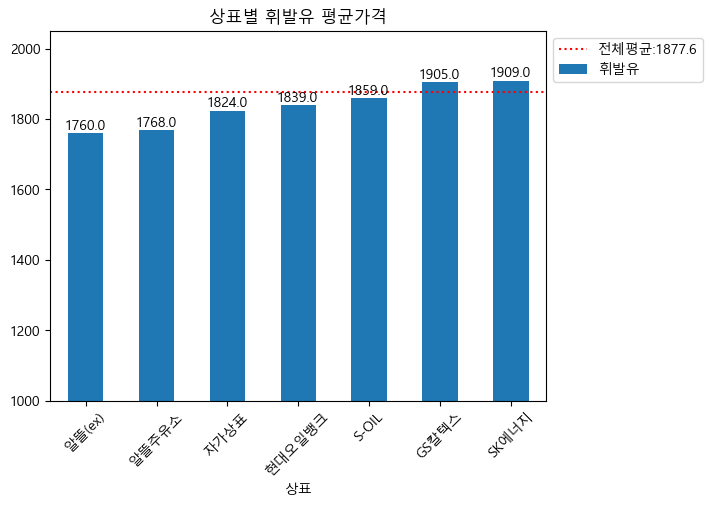

In [109]:
# 상표별 휘발유 평균가격 시각화
휘발유_전체_평균 = np.round(df['휘발유'].mean(), 2)

상표별_휘발유_평균가격.plot(kind='bar', rot=45)

plt.axhline(휘발유_전체_평균, color='red', linestyle=':', label=f'전체평균:{휘발유_전체_평균}')

for i in range(상표별_휘발유_평균가격.size):
    txt = str(np.round(상표별_휘발유_평균가격[i]))
    plt.text(i-0.3, 상표별_휘발유_평균가격[i]+10, txt)

plt.title('상표별 휘발유 평균가격')
plt.ylim(1000, 2050)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [6]:
# 셀프주유소와 일반주유소 개수 확인
df['셀프여부'].value_counts()
df['셀프여부'].value_counts(normalize=True)

셀프    0.562238
일반    0.437762
Name: 셀프여부, dtype: float64

In [8]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 
df.groupby('셀프여부')['휘발유'].mean()
df.query("휘발유 != 0").groupby('셀프여부')['휘발유'].mean()

셀프여부
셀프    1820.637908
일반    1958.713098
Name: 휘발유, dtype: float64

In [19]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
# df.groupby(['상표', '셀프여부'])['휘발유'].mean().to_frame()
df.groupby(['상표', '셀프여부'])['휘발유'].mean().unstack() #    level=0)

셀프여부,셀프,일반
상표,,
GS칼텍스,1825.849350,2001.420217
S-OIL,1820.122748,1932.115939
SK에너지,1826.717027,2003.229520
알뜰(ex),1759.884932,NaN
알뜰주유소,1754.261378,1796.201557
자가상표,2017.000000,1821.768493
현대오일뱅크,1807.265898,1877.606059


In [21]:
상표_셀프여부별_휘발유_평균 = df.pivot_table(index='상표', columns='셀프여부', values='휘발유', aggfunc='mean', margins=True)
상표_셀프여부별_휘발유_평균

셀프여부,셀프,일반,All
상표,,,
GS칼텍스,1825.849350,2001.420217,1904.899429
S-OIL,1820.122748,1932.115939,1859.282595
SK에너지,1826.717027,2003.229520,1908.900823
알뜰(ex),1759.884932,NaN,1759.884932
알뜰주유소,1754.261378,1796.201557,1767.914672
자가상표,2017.000000,1821.768493,1823.622795
현대오일뱅크,1807.265898,1877.606059,1839.447215
All,1818.216376,1953.870993,1877.600838


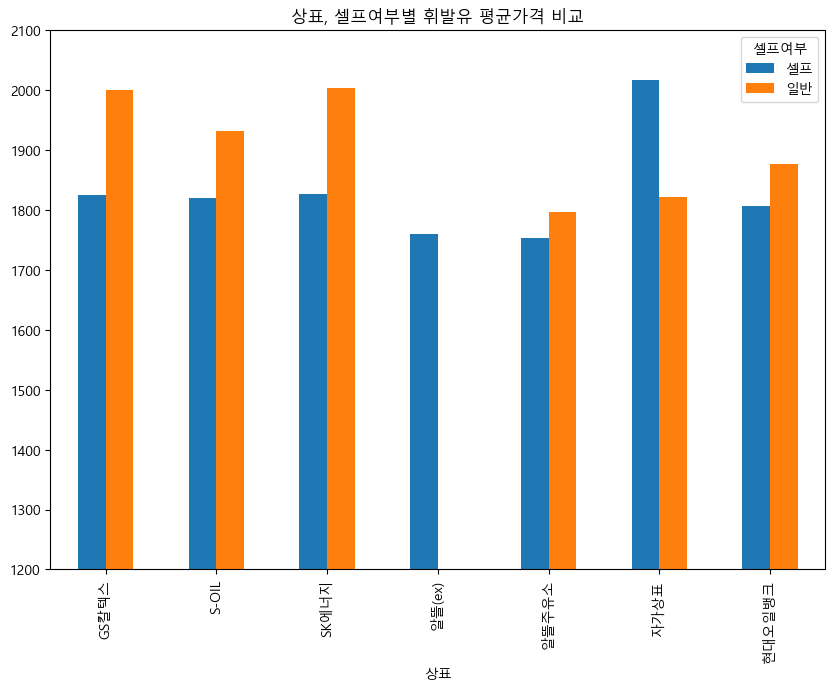

In [27]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화
상표_셀프여부별_휘발유_평균[['셀프', '일반']].iloc[:-1].plot(kind='bar', 
                                                title='상표, 셀프여부별 휘발유 평균가격 비교', 
                                                ylim=(1200, 2100), 
                                                figsize=(10,7))

plt.show()

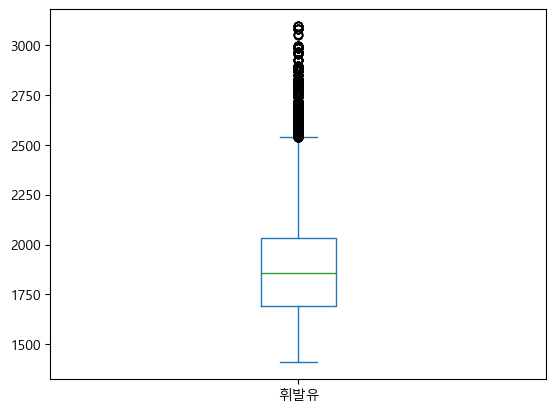

In [30]:
#  휘발유 가격 boxplot
# plt.boxplot(df.query('휘발유!=0')['휘발유'])
df.query('휘발유!=0')['휘발유'].plot(kind='box')
plt.show()

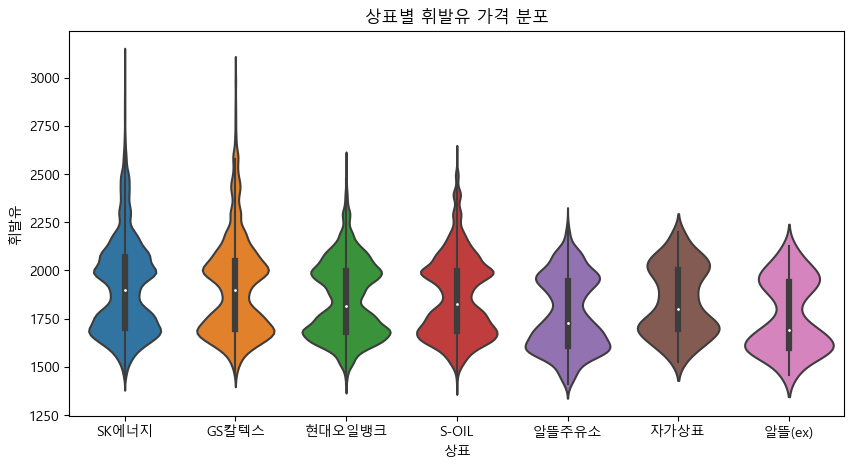

In [42]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
# df.query('휘발유 != 0').groupby('상표')['휘발유'].mean()
plt.figure(figsize=(10,5))
# sns.boxplot(data=df.query('휘발유!=0'), y='휘발유', x='상표')  # y: 연속형 -> 4분위, 정상범위 등을 계산,  x: 범주형 - 나누는 대상
sns.violinplot(data=df.query('휘발유!=0'), y='휘발유', x='상표')
plt.title('상표별 휘발유 가격 분포')
plt.show()

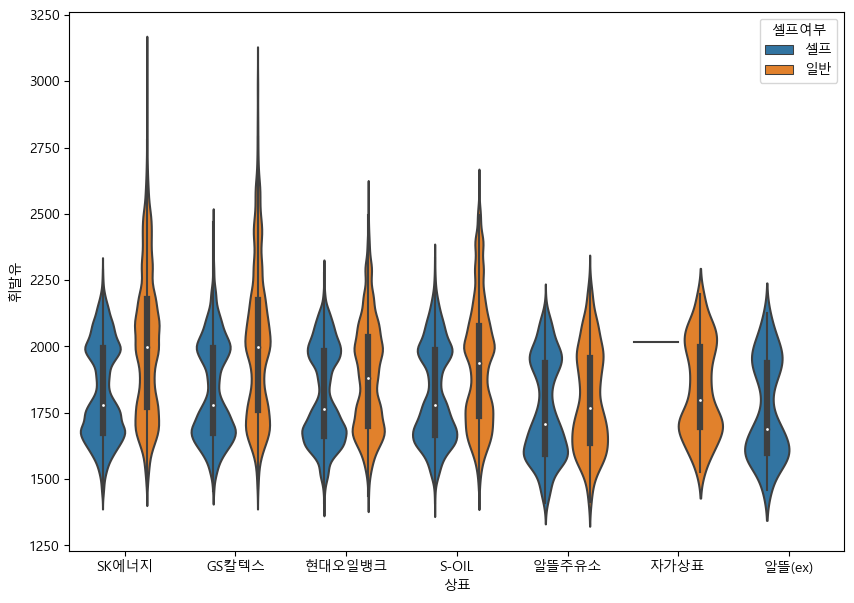

In [40]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
plt.figure(figsize=(10,7))
# sns.boxplot(data=df.query('휘발유 != 0'), y='휘발유', x='상표', hue='셀프여부') # hue: 범주형 -> 범주값에 따라 다른 색으로 구분해서 그린다. (따로 그린다.)
sns.violinplot(data=df.query('휘발유 != 0'), y='휘발유', x='상표', hue='셀프여부')
plt.show()

In [46]:
# 구별 휘발유 가격의 평균
result = df.query('휘발유 != 0').groupby('구')['휘발유'].mean().sort_values(ascending=False)
result

구
용산구     2220.150152
중구      2164.813156
종로구     2130.644512
강남구     2027.348234
성동구     1927.180711
강동구     1911.814372
서초구     1908.632928
마포구     1883.471491
영등포구    1867.273173
구로구     1866.193142
관악구     1855.413983
동작구     1850.987097
송파구     1847.526087
노원구     1846.423689
강서구     1829.916928
동대문구    1826.440487
은평구     1823.821755
광진구     1820.783333
서대문구    1820.522224
성북구     1807.024316
중랑구     1805.788631
금천구     1804.142998
양천구     1803.676968
도봉구     1801.099349
강북구     1787.720341
Name: 휘발유, dtype: float64

In [55]:
#boolean indexing - df[bool연산-행] [컬럼명],  df.loc[bool연산-행 , 컬럼]

# 평균 가격이 가장 높은 구의 상표별 휘발유 평균가격
df.loc[df['구']==result.index[0]].groupby('상표')['휘발유'].mean()

상표
GS칼텍스     2386.086653
SK에너지     2245.048402
현대오일뱅크    2013.058905
Name: 휘발유, dtype: float64

In [57]:
# 월 평균 휘발유 가격
월별_평균_휘발유_가격 = df.query('휘발유!=0').groupby('월')['휘발유'].mean()
월별_평균_휘발유_가격

월
1     1705.212460
2     1782.078505
3     2011.746876
4     2036.850250
5     2027.546073
6     2151.490272
7     2082.968590
8     1858.737602
9     1799.950232
10    1737.664435
11    1719.719665
12    1648.983053
Name: 휘발유, dtype: float64

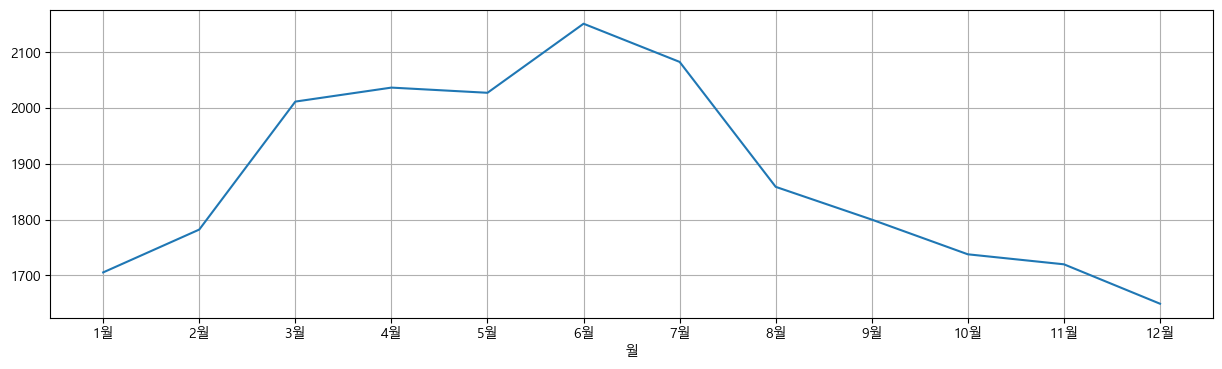

In [63]:
# 월 평균 휘발유 가격  변화추이를 시각화
월별_평균_휘발유_가격.plot(figsize=(15, 4))
plt.xticks(range(1, 13), labels=[str(i)+'월' for i in range(1,13)]) 
plt.grid(True)
plt.show()

In [68]:
pd.options.display.max_columns = 30

In [69]:
# 각 구의 월별 평균 휘발유 가격 
구_월별_휘발류_평균가격 = np.round(df.pivot_table(index='월', columns='구', values='휘발유', aggfunc='mean'), 2)   # 반올림
구_월별_휘발류_평균가격

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,,,,,
1,1845.04,1732.29,1599.38,1657.35,1693.37,1643.83,1679.96,1643.85,1671.23,1613.96,1644.44,1683.45,1730.17,1640.01,1736.54,1734.80,1632.61,1678.79,1633.02,1700.58,2046.39,1641.13,1924.91,2002.51,1624.84
2,1914.71,1797.40,1692.99,1744.52,1767.61,1733.17,1754.28,1718.96,1749.08,1702.60,1725.77,1759.79,1787.93,1722.96,1810.23,1810.23,1715.84,1741.30,1711.94,1777.38,2119.34,1714.38,1995.06,2073.92,1714.38
3,2109.48,2020.05,1954.91,1968.37,1992.62,1965.27,2005.56,1947.87,1981.65,1964.16,1973.45,1994.85,2018.03,1961.00,2022.52,2042.38,1961.17,1967.73,1943.26,2006.05,2266.33,1956.02,2193.61,2235.39,1948.59
4,2138.08,2075.56,1968.94,1994.08,2012.60,1975.05,2035.07,1948.89,2007.24,1974.97,1983.04,2012.12,2006.61,1991.92,2057.17,2078.88,1978.13,2001.12,1962.07,2035.38,2267.59,1984.84,2230.10,2182.42,1977.86
5,2137.11,2055.98,1946.04,1989.01,1986.18,1959.89,2015.15,1941.69,2007.70,1958.48,1974.71,1992.06,2030.63,1973.36,2052.73,2060.63,1957.71,1991.34,1954.15,2027.46,2387.13,1966.93,2252.17,2325.95,1954.36
6,2273.51,2174.08,2077.16,2118.27,2117.29,2096.48,2132.77,2081.94,2117.35,2086.65,2100.45,2105.01,2162.42,2099.05,2169.57,2190.38,2088.65,2115.77,2084.83,2143.57,2471.29,2087.96,2350.65,2434.63,2076.31
7,2223.27,2125.90,1976.94,2037.92,2061.85,2018.15,2078.69,1998.35,2070.65,2002.05,2036.37,2033.61,2082.37,2023.47,2103.18,2139.18,2012.29,2056.82,2004.27,2056.82,2381.95,2028.06,2327.39,2331.20,2022.89
8,2013.87,1910.25,1756.04,1814.66,1829.48,1785.53,1854.95,1788.94,1829.00,1774.89,1795.30,1814.77,1858.82,1798.13,1886.70,1915.36,1772.32,1826.30,1773.62,1836.01,2165.80,1804.53,2158.13,2137.11,1773.06
9,1965.88,1829.52,1692.45,1744.27,1778.40,1734.72,1786.94,1731.79,1767.56,1712.80,1735.96,1763.07,1799.09,1743.46,1835.89,1848.38,1709.31,1758.67,1715.98,1767.26,2130.39,1738.69,2110.46,2100.51,1717.47


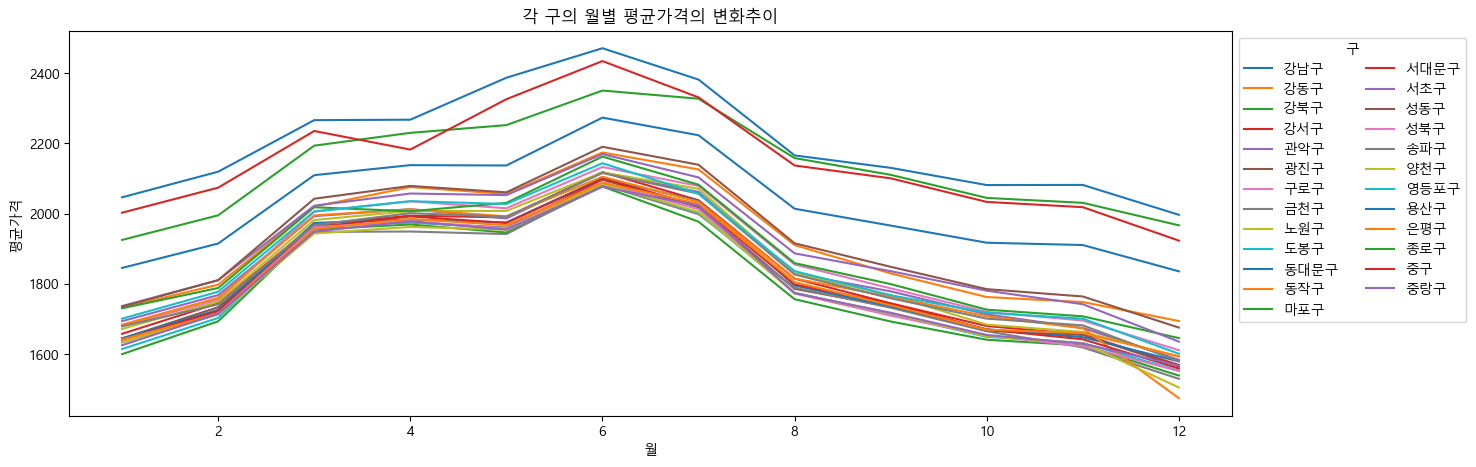

In [76]:
# 각 구의 월별 평균가격의 변화추이 시각화
구_월별_휘발류_평균가격.plot(figsize=(15, 5), title='각 구의 월별 평균가격의 변화추이', 
                           ylabel='평균가격')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=2, title='구')
plt.show()

In [84]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
# df.loc[df['휘발유'].sort_values(ascending=False).head(5).index]
# 상호, 주소 나눔.=>주소: 상호가 같은 주유소가 있을 경우를 대비
비싼주유소 = df.groupby(['상호', '주소'])['휘발유'].max().sort_values(ascending=False).head(5)
비싼주유소

상호      주소                     
서남주유소   서울 중구 통일로 30               3096
서계주유소   서울 용산구  청파로 367 (청파동)      3050
필동주유소   서울 중구 퇴계로 196 (필동2가)       2789
동자동주유소  서울 용산구 한강대로104길 6 (동자동)    2690
한석주유소   서울 용산구 이촌로 164             2681
Name: 휘발유, dtype: int64

In [92]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
저렴한주유소 = df.query('휘발유!=0').groupby(['상호', '주소'])['휘발유'].max().sort_values().head(5)
저렴한주유소

상호                 주소                       
(주)동원석유            경기도 부천시 원미구  부흥로 182 (중동)    1654
송파알찬주유소            서울 송파구 백제고분로 229 (삼전동)       1690
(주)명보에너지           경기도 시흥시  수인로 2186 (목감동)      1755
정다운셀프주유소           서울 도봉구 도봉로 635               1759
오션네트웍스(주) 서울식물원지점  서울 강서구 양천로 300               1940
Name: 휘발유, dtype: int64

In [101]:
df.query('상호 == "서남주유소"')[['상호', '주소', '지역', '상표', '경유']].drop_duplicates() # 중복 행을 제거

,상호,주소,지역,상표,경유
78766,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2288
78769,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2316
78776,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2335
78783,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2376
78793,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2010
78797,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,1599
78799,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2410
78801,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2425
78804,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2461
78811,서남주유소,서울 중구 통일로 30,서울 중구,SK에너지,2472


In [107]:
# index나 컬럼명이 여러개 => Multi-Index
# 특정 level의 index를 조회 (level-> 밖에서 안쪽으로 0 ~ N 1씩 증가. (음수 index도 있다.))
저렴한주유소.index.get_level_values(0)  # level 0 index값들을 조회
저렴한주유소.index.get_level_values(-1)  # 맨 안쪽 index

Index(['경기도 부천시 원미구  부흥로 182 (중동)', '서울 송파구 백제고분로 229 (삼전동)',
       '경기도 시흥시  수인로 2186 (목감동)', '서울 도봉구 도봉로 635', '서울 강서구 양천로 300'],
      dtype='object', name='주소')

In [111]:
비싼주유소.index.get_level_values(1)

Index(['서울 중구 통일로 30', '서울 용산구  청파로 367 (청파동)', '서울 중구 퇴계로 196 (필동2가)',
       '서울 용산구 한강대로104길 6 (동자동)', '서울 용산구 이촌로 164'],
      dtype='object', name='주소')

In [117]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates)
#                                                          ==> 비싼 주유소 조회결과에 추가정보를 확인
df.loc[df['상호'].isin(비싼주유소.index.get_level_values(0)) &  
       df['주소'].isin(비싼주유소.index.get_level_values(1)), ['상호', '지역', '주소']].drop_duplicates()

,상호,지역,주소
72190,동자동주유소,서울 용산구,서울 용산구 한강대로104길 6 (동자동)
72371,서계주유소,서울 용산구,서울 용산구 청파로 367 (청파동)
73095,한석주유소,서울 용산구,서울 용산구 이촌로 164
78766,서남주유소,서울 중구,서울 중구 통일로 30
79846,필동주유소,서울 중구,서울 중구 퇴계로 196 (필동2가)


In [125]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)
df.query("상호 in @저렴한주유소.index.get_level_values(0) and 주소 in @저렴한주유소.index.get_level_values(1)")\
[['상호', '지역', '주소']].drop_duplicates()

,상호,지역,주소
25556,(주)명보에너지,서울 금천구,경기도 시흥시 수인로 2186 (목감동)
32304,정다운셀프주유소,서울 도봉구,서울 도봉구 도봉로 635
43575,(주)동원석유,서울 서초구,경기도 부천시 원미구 부흥로 182 (중동)
59953,송파알찬주유소,서울 송파구,서울 송파구 백제고분로 229 (삼전동)
97148,오션네트웍스(주) 서울식물원지점,서울 강서구,서울 강서구 양천로 300


In [138]:
# 고급 휘발유를 가장 많이 파는 구 조회
df.query('고급휘발유!=0').groupby('구')['고급휘발유'].count().sort_values(ascending=False)  #동일한 주유소가 같이 count가 됨.

구
강남구     10784
서초구      8460
송파구      6295
성북구      4727
용산구      4537
강서구      4515
영등포구     4499
성동구      3719
양천구      3145
종로구      2930
은평구      2910
중구       2871
서대문구     2550
광진구      2519
노원구      2361
동작구      1877
도봉구      1838
관악구      1822
마포구      1819
동대문구     1815
금천구      1662
구로구      1598
강동구      1553
중랑구      1225
강북구      1211
Name: 고급휘발유, dtype: int64

In [135]:
df.query('고급휘발유!=0')[['구','상호','주소']].drop_duplicates().groupby('구').count()['상호']\
.sort_values(ascending=False)

구
강남구     30
서초구     26
송파구     18
성북구     15
강서구     13
용산구     13
영등포구    13
성동구     11
종로구      9
양천구      9
은평구      8
중구       8
광진구      7
노원구      7
서대문구     7
동작구      6
강동구      6
도봉구      6
마포구      5
동대문구     5
금천구      5
구로구      5
관악구      5
강북구      5
중랑구      4
Name: 상호, dtype: int64

In [ ]:
###############################################################################
# 주유소 가격 데이터를 이용해서 알고 싶은 정보들을 추가 분석해 보세요.
###############################################################################
